In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

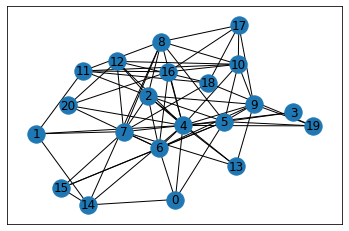

In [3]:
numV=21
G = nx.read_gml("../../data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)

In [4]:
params={'G': G}
qaoamc = QAOAMaxCut()

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')

In [6]:
qaoamc.sample_cost_landscape(qasm_sim, 1024, params=params, angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi,20]})

Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


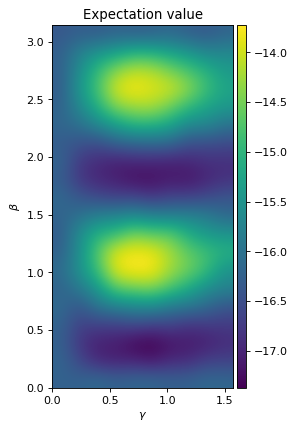

In [7]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

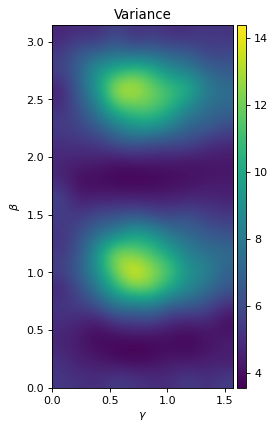

In [8]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoamc.Var,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

rep= 0 : -17.130741152463013
rep= 1 : -16.285096698458485
rep= 2 : -17.03894330266171
rep= 3 : -16.624646265512393
rep= 4 : -16.268886401180648
-17.28852410137951
[0.86625978 0.26650967]
rep= 0 : -17.236854811414123
rep= 1 : -16.906637481272632
rep= 2 : -16.38430200300227
rep= 3 : -16.387179582614895
rep= 4 : -17.26881914728318
-17.40317717000138
[0.81502509 0.21329607 0.87402257 0.16591801]
rep= 0 : -17.339823492888662
rep= 1 : -16.191983046231822
rep= 2 : -16.367319840623
rep= 3 : -16.77691234103259
rep= 4 : -17.00081196567881
-17.4154401353069
[0.8167068  0.23133609 0.81686462 0.15400053 1.93980699 0.10482015]


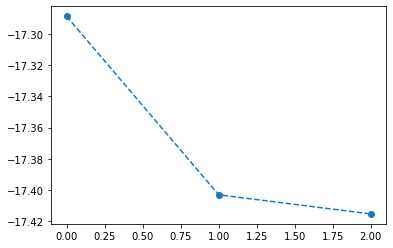

In [9]:
for i in range(3):
    qaoamc.increase_depth(qasm_sim, 1024, params=params)
pl.plot(qaoamc.costval.values(),'o--')

(0.0, 1.05)

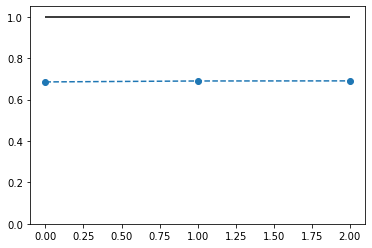

In [10]:
import itertools
state_strings = np.array([''.join(i) for i in itertools.product('01', repeat= G.number_of_nodes())])
mincost=0
for st in state_strings:
    mincost=min(mincost,-qaoamc.cost(st,params=params))
mincost
pl.plot(np.array(list(qaoamc.costval.values()))/mincost,'o--')
pl.hlines(1, 0,2, linestyles="solid", colors="black")
pl.ylim(0,1.05)